This is a proof-of-concept notebook that generates a single polymer containing 10 monomers with no charge

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [154]:
def gen_monomer_axis(axis, axlabel):
    r = 1
    d = random.uniform(0, r) * random.choice((-1, 1))
    if axlabel == 'y':
        d = np.abs(d)
    return axis + d

def create_polymer(save_data=False):
    """ 
    Instantiate a monomer at a random position (X, Y, Z=0) with the following constraints:
    1. The monomers cannot occupy the same space
    2. The monomers are must all be at most a distance r=1 apart from each other
    
    Remaining questions:
    1. How many polymers do we want in a single plane?
    2. How many monomers do we want per polymer?

    Parameter(s)
    -----------
    No current parameters at this time
    
    Returns
    -------
    fig : matplitlib.figure object
    """
    # Initialize matplotlib canvas that we will plot a 3D plane on
    fig = plt.figure()

    # This new axis (`ax`) is a 3D projection
    ax = plt.axes(projection="3d")
    
    # Let's set the axis limits for each dimension 10
    ax.axes.set_xlim3d(left=0, right=10) 
    ax.axes.set_ylim3d(bottom=0, top=10) 
    ax.axes.set_zlim3d(bottom=0, top=10) 

    # Initialize the starting coordinate for the FIRST monomer in the polymer.
    # We randomize the starting position of X and Y (start_x and start_y), but the
    # starting position of Z (start_z) will always be 0. The upper-limit of the
    # randomization for start_x and start_y is 10, because that's the length of the
    # X and Y axis.
    start_x, start_y, start_z = np.random.randint(0, 10), np.random.randint(0, 10), 0

    # Initialize 3 empty lists, one for each axis. These lists will house the coordinates
    # of each of the monomers within the polymer. Currently, the plan is to house 10 monomers per polymer. 
    xs, ys, zs = [], [], []

    # Let's put our initial coordinate into the lists
    xs.append(start_x)
    ys.append(start_y)
    zs.append(start_z)

    # Create a while loop, that will run until the last list (zs) reaches 10.
    # Which means we officially have 10 coordinates, for 10 monomers
    while len(zs) < 10:

        for axis, axlabel in zip([xs, ys, zs], ['x', 'y', 'z']):
            new_monomer = gen_monomer_axis(axis[-1], axlabel)
            axis.append(new_monomer)
            #print(axis)

    # Plot the coordinates, setting s=100. makes the data points bigger and easier to see. You
    # can play with this
    ax.scatter(xs, ys, zs, s=100.)

    # Plot the figure
    plt.show()
    
    if save_data:
        d = {'x': xs, 'y': ys, 'z': zs}
        df = pd.DataFrame(data=d)
        df.to_csv("initial_polymer.dat")
        
        return "New file was written... initial_polymer.dat"

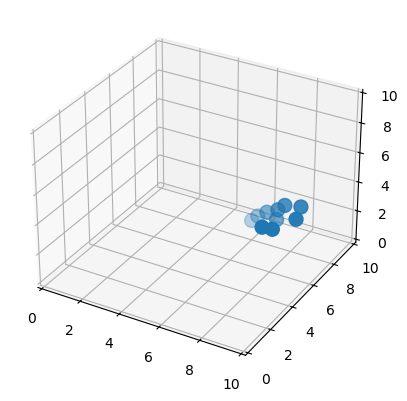

'New file was written... initial_polymer.dat'

In [159]:
create_polymer(save_data=True)